<a href="https://colab.research.google.com/github/CristianoDataScience/Analise-Estat-stica-Enem_2019/blob/main/Correlacao_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Correlação

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
enem_sp = pd.read_csv('/content/drive/MyDrive/curso estatistica/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')


In [7]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,publica,35017632.0,...,537.1,Ingles,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,publica,35017632.0,...,451.9,Ingles,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Nao
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,publica,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Nao
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,publica,35017632.0,...,59.5,Ingles,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,publica,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim


In [8]:
colegiox.shape

(41, 28)

In [9]:
# Lista com nota final
nota_final = ['NOTA_CN', 'NOTA_CH', 'NOTA_MT', 'NOTA_LC', 'NOTA_REDACAO']

In [10]:
colegiox['nota_final'] = (colegiox[nota_final].mean(axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,nota_final
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,publica,35017632.0,...,Ingles,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim,385.58
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,publica,35017632.0,...,Ingles,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Nao,548.42
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,publica,35017632.0,...,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Nao,399.60
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,publica,35017632.0,...,Ingles,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim,446.16
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,publica,35017632.0,...,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim,433.62


In [12]:
nota_colegiox = colegiox[['NOTA_CN', 'NOTA_CH', 'NOTA_MT', 'NOTA_LC', 'NOTA_REDACAO', 'nota_final']]

In [13]:
nota_colegiox

,NOTA_CN,NOTA_CH,NOTA_MT,NOTA_LC,NOTA_REDACAO,nota_final
37,46.3,447.2,537.1,557.3,340.0,385.58
44,505.9,534.5,451.9,529.8,720.0,548.42
52,449.4,436.4,506.4,45.8,560.0,399.60
65,468.6,606.1,59.5,576.6,520.0,446.16
79,414.3,553.7,510.6,49.5,640.0,433.62
84,397.8,458.5,420.6,473.5,360.0,422.08
85,469.1,528.7,508.2,488.4,680.0,534.88
91,436.3,528.8,537.9,530.7,560.0,518.74
17070,464.8,501.5,500.3,566.3,600.0,526.58
17072,465.8,488.4,42.4,46.8,520.0,312.68


## Gráfico de Correlação

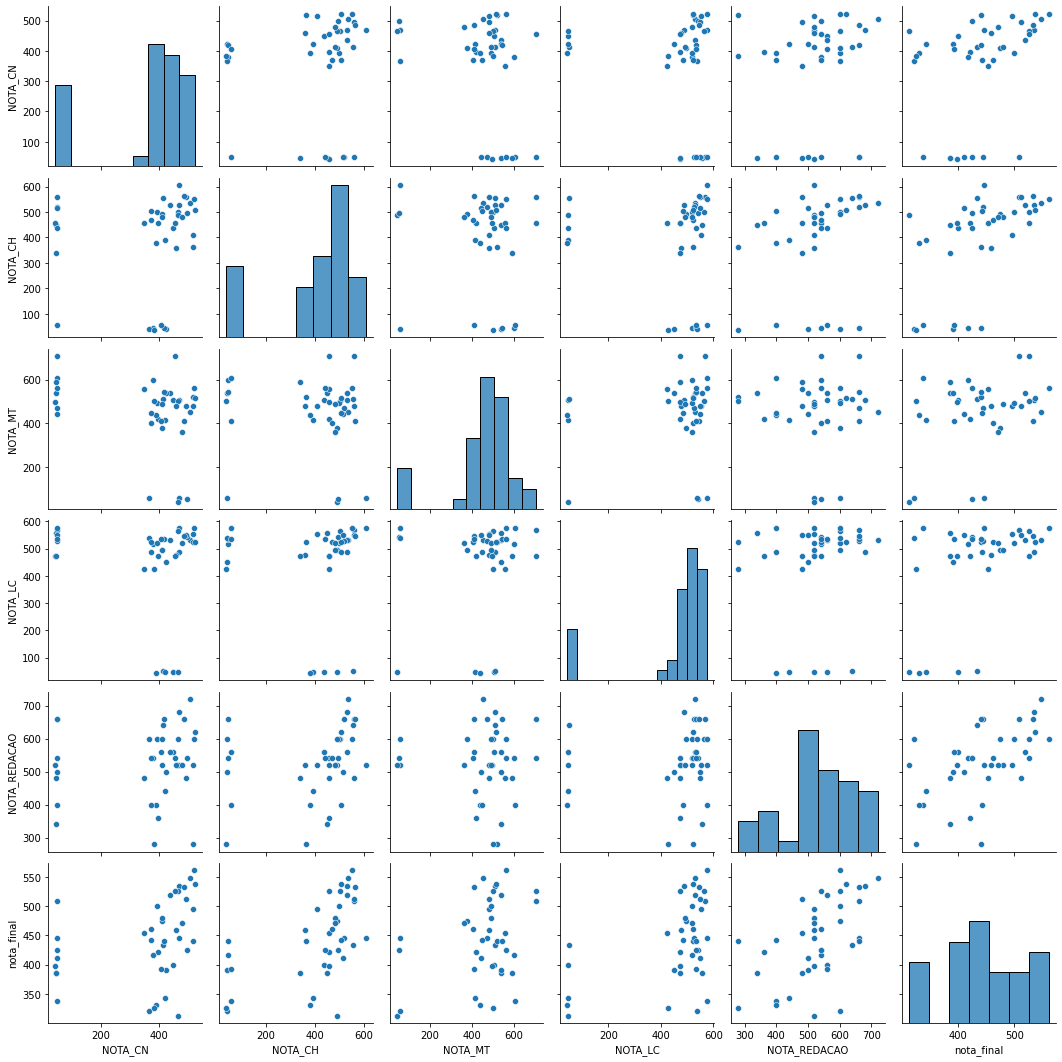

In [16]:
sns.pairplot(nota_colegiox);

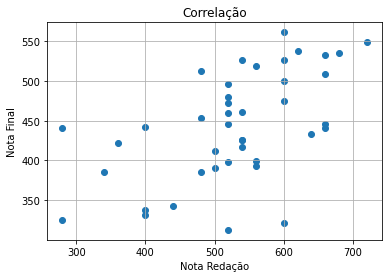

In [17]:
plt.scatter(nota_colegiox.NOTA_REDACAO, nota_colegiox.nota_final)
plt.title('Correlação')
plt.xlabel('Nota Redação')
plt.ylabel('Nota Final')
plt.grid(True)
plt.show()

In [18]:
correlacoes = nota_colegiox.corr(method='pearson')
correlacoes

,NOTA_CN,NOTA_CH,NOTA_MT,NOTA_LC,NOTA_REDACAO,nota_final
NOTA_CN,1.000000,0.083520,-0.299411,-0.158243,0.132366,0.352986
NOTA_CH,0.083520,1.000000,-0.078817,-0.040875,0.264781,0.579168
NOTA_MT,-0.299411,-0.078817,1.000000,0.137463,-0.024316,0.322042
NOTA_LC,-0.158243,-0.040875,0.137463,1.000000,0.125635,0.472561
NOTA_REDACAO,0.132366,0.264781,-0.024316,0.125635,1.000000,0.551220
nota_final,0.352986,0.579168,0.322042,0.472561,0.551220,1.000000


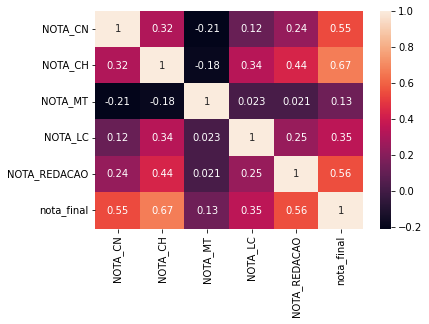

In [21]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

## Análise da Normalidade

#### Teste Shapiro-Wilk
___
#### Ho = média é igual a de São Paulo: p > 0,05
#### Ha = média é diferente da de São Paulo: p <= 0,05

In [44]:
import scipy.stats as stats

In [89]:
# Nota de redação
stats.shapiro(nota_colegiox.NOTA_REDACAO)

ShapiroResult(statistic=0.952975869178772, pvalue=0.08905196189880371)

In [90]:
# Nota final
stats.shapiro(nota_colegiox.nota_final)

ShapiroResult(statistic=0.9638935923576355, pvalue=0.2148178666830063)

In [91]:
# Nota de matemática
stats.shapiro(nota_colegiox.NOTA_MT)

ShapiroResult(statistic=0.798567533493042, pvalue=5.104646334075369e-06)

In [92]:
# Nota de Ciências da Natureza
stats.shapiro(nota_colegiox.NOTA_CN)

ShapiroResult(statistic=0.7349029779434204, pvalue=2.995314787312964e-07)

In [94]:
# Nota de Linguagem e Códigos
stats.shapiro(nota_colegiox.NOTA_LC)

ShapiroResult(statistic=0.598617434501648, pvalue=2.23514540209635e-09)

In [95]:
# Nota de Ciências Humanas
stats.shapiro(nota_colegiox.NOTA_CH)

ShapiroResult(statistic=0.7509256601333618, pvalue=5.865637717761274e-07)

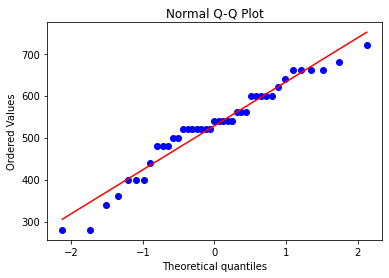

In [96]:
stats.probplot(nota_colegiox['NOTA_REDACAO'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

## Análise dos Outliers

In [98]:
grafico = px.box(nota_colegiox, y='NOTA_REDACAO')
grafico.show()

In [99]:
grafico = px.box(nota_colegiox, y='NOTA_MT')
grafico.show()

In [100]:
grafico = px.box(nota_colegiox, y='NOTA_CN')
grafico.show()

In [102]:
grafico = px.box(nota_colegiox, y='NOTA_LC')
grafico.show()

In [101]:
grafico = px.box(nota_colegiox, y='nota_final')
grafico.show()